In [16]:
import pandas as pd

data = pd.read_csv('../contact.csv',
                    parse_dates=[2,3],
                    infer_datetime_format=True)

data

,Target,Observer,Start Time (UTC),Stop Time (UTC),Duration (s)
0,SCD2,EMMN,2000-01-01 16:08:03.347,2000-01-01 16:16:48.956,525.609391
1,SCD2,EMMN,2000-01-01 17:52:52.168,2000-01-01 18:04:50.303,718.134748
2,SCD2,EMMN,2000-01-01 19:39:36.926,2000-01-01 19:50:56.086,679.160639
3,SCD2,EMMN,2000-01-01 21:28:11.340,2000-01-01 21:36:10.774,479.434136
4,SCD2,EMMN,2000-01-01 23:17:37.296,2000-01-01 23:21:45.004,247.708364
...,...,...,...,...,...
305,CBERS4A,ETC,2000-01-05 04:52:00.084,2000-01-05 04:57:10.578,310.493522
306,CBERS4A,ETC,2000-01-05 06:28:09.383,2000-01-05 06:39:06.453,657.070285
307,CBERS4A,ETC,2000-01-05 17:29:29.422,2000-01-05 17:40:42.352,672.930618
308,CBERS4A,ETC,2000-01-05 19:12:49.470,2000-01-05 19:15:32.254,162.784272


In [27]:
diff = data["Stop Time (UTC)"] - data["Start Time (UTC)"]

diff

AttributeError: 'Series' object has no attribute 'total_seconds'

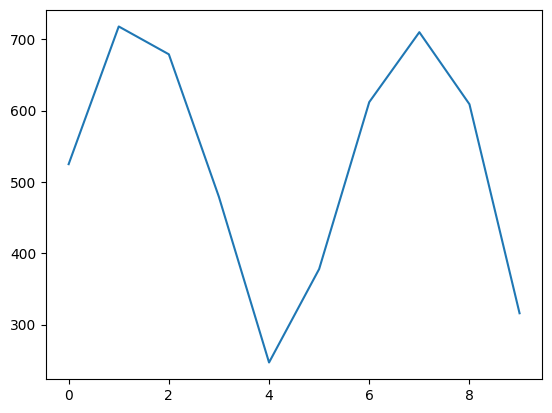

In [47]:
import matplotlib.pyplot as plt

plt.plot(diff[0:10]/1e9)


In [50]:
from ctypes import sizeof


time = 0

rows,cols = data.shape

data['Time'] = 0

for i in range(1,rows) :
    data['Time'][i] =  data['Start Time (UTC)'][i] - data['Stop Time (UTC)'][i-1]

data['Time'][0]=0

data

/tmp/ipykernel_7631/2697863383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'][i] =  data['Start Time (UTC)'][i] - data['Stop Time (UTC)'][i-1]


,Target,Observer,Start Time (UTC),Stop Time (UTC),Duration (s),Time
0,SCD2,EMMN,2000-01-01 16:08:03.347,2000-01-01 16:16:48.956,525.609391,0
1,SCD2,EMMN,2000-01-01 17:52:52.168,2000-01-01 18:04:50.303,718.134748,0 days 01:36:03.212000
2,SCD2,EMMN,2000-01-01 19:39:36.926,2000-01-01 19:50:56.086,679.160639,0 days 01:34:46.623000
3,SCD2,EMMN,2000-01-01 21:28:11.340,2000-01-01 21:36:10.774,479.434136,0 days 01:37:15.254000
4,SCD2,EMMN,2000-01-01 23:17:37.296,2000-01-01 23:21:45.004,247.708364,0 days 01:41:26.522000
...,...,...,...,...,...,...
305,CBERS4A,ETC,2000-01-05 04:52:00.084,2000-01-05 04:57:10.578,310.493522,0 days 10:36:08.829000
306,CBERS4A,ETC,2000-01-05 06:28:09.383,2000-01-05 06:39:06.453,657.070285,0 days 01:30:58.805000
307,CBERS4A,ETC,2000-01-05 17:29:29.422,2000-01-05 17:40:42.352,672.930618,0 days 10:50:22.969000
308,CBERS4A,ETC,2000-01-05 19:12:49.470,2000-01-05 19:15:32.254,162.784272,0 days 01:32:07.118000


TypeError: float() argument must be a string or a real number, not 'Timedelta'

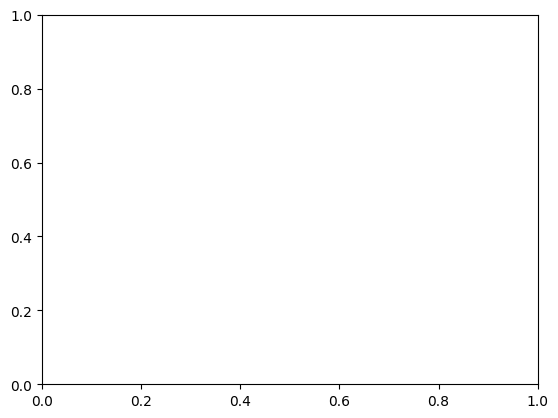

In [52]:
plt.plot(data['Time'][1:])